In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


In [2]:
df = pd.read_csv('data/data.csv')
df.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3,7,4,26.822620,265,No,80.415295,312.494089,Good,Good,...,23,19114.12,3,4,3,4,1824.843333,11.27,809.98,49.574949
1,3,7,4,31.944960,265,No,118.280222,284.629163,Good,Good,...,23,19114.12,3,4,3,4,1824.843333,11.27,809.98,49.574949
2,3,7,4,28.609352,267,No,81.699521,331.209863,Good,Good,...,23,19114.12,3,4,3,4,1824.843333,11.27,809.98,49.574949
3,5,4,4,31.377862,268,No,199.458074,223.451310,Good,Good,...,23,19114.12,3,4,3,4,1824.843333,11.27,809.98,49.574949
4,6,4,4,24.797347,269,No,41.420153,341.489231,Good,Good,...,23,19114.12,3,4,3,4,1824.843333,11.27,809.98,49.574949


In [3]:
##handling missing values
df.isnull().sum()

Delay_from_due_date         0
Num_of_Delayed_Payment      0
Num_Credit_Inquiries        0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Amount_invested_monthly     0
Monthly_Balance             0
Credit_Score                0
Credit_Mix                  0
Payment_Behaviour           0
Age                         0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Monthly_Inhand_Salary       0
Changed_Credit_Limit        0
Outstanding_Debt            0
Total_EMI_per_month         0
dtype: int64

## There is no missing values in the dataset if exist so we will fill with mean , median or mode 


In [4]:
## check the duplicate records
df.duplicated().sum()

np.int64(0)

In [5]:
df.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3,7,4,26.822620,265,No,80.415295,312.494089,Good,Good,...,23,19114.12,3,4,3,4,1824.843333,11.27,809.98,49.574949
1,3,7,4,31.944960,265,No,118.280222,284.629163,Good,Good,...,23,19114.12,3,4,3,4,1824.843333,11.27,809.98,49.574949
2,3,7,4,28.609352,267,No,81.699521,331.209863,Good,Good,...,23,19114.12,3,4,3,4,1824.843333,11.27,809.98,49.574949
3,5,4,4,31.377862,268,No,199.458074,223.451310,Good,Good,...,23,19114.12,3,4,3,4,1824.843333,11.27,809.98,49.574949
4,6,4,4,24.797347,269,No,41.420153,341.489231,Good,Good,...,23,19114.12,3,4,3,4,1824.843333,11.27,809.98,49.574949


In [6]:
df.columns= df.columns.str.strip()


In [7]:
df

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3,7,4,26.822620,265,No,80.415295,312.494089,Good,Good,...,23,19114.12,3,4,3,4,1824.843333,11.27,809.98,49.574949
1,3,7,4,31.944960,265,No,118.280222,284.629163,Good,Good,...,23,19114.12,3,4,3,4,1824.843333,11.27,809.98,49.574949
2,3,7,4,28.609352,267,No,81.699521,331.209863,Good,Good,...,23,19114.12,3,4,3,4,1824.843333,11.27,809.98,49.574949
3,5,4,4,31.377862,268,No,199.458074,223.451310,Good,Good,...,23,19114.12,3,4,3,4,1824.843333,11.27,809.98,49.574949
4,6,4,4,24.797347,269,No,41.420153,341.489231,Good,Good,...,23,19114.12,3,4,3,4,1824.843333,11.27,809.98,49.574949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99955,23,7,3,34.663572,378,No,60.971333,479.866228,Poor,Good,...,25,39628.99,4,6,7,2,3359.415833,11.50,502.38,35.104023
99956,18,7,3,40.565631,379,No,54.185950,496.651610,Poor,Good,...,25,39628.99,4,6,7,2,3359.415833,11.50,502.38,35.104023
99957,27,6,3,41.255522,380,No,24.028477,516.809083,Poor,Good,...,25,39628.99,4,6,7,2,3359.415833,11.50,502.38,35.104023
99958,20,6,3,33.638208,381,No,251.672582,319.164979,Standard,Good,...,25,39628.99,4,6,7,2,3359.415833,11.50,502.38,35.104023


In [8]:
numerical_columns = df.select_dtypes(exclude = ['object']).columns.to_list()
categorical_columns = df.select_dtypes(include = ['object']).columns.to_list()
print(numerical_columns)
print(categorical_columns)

['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance', 'Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Monthly_Inhand_Salary', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Total_EMI_per_month']
['Payment_of_Min_Amount', 'Credit_Score', 'Credit_Mix', 'Payment_Behaviour']


In [9]:
df.describe()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
count,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000
mean,21.095718,13.336345,5.774570,32.284544,221.122819,193.665219,403.445100,33.269228,50498.704153,5.368868,5.532853,14.535174,3.533974,4196.814288,10.396953,1426.514966,105.565802
std,14.827414,6.269964,3.862224,5.116888,99.696084,194.782737,214.387092,10.762371,38294.243161,2.591668,2.067698,8.741047,2.446156,3186.518163,6.510846,1155.252504,125.820983
min,0.000000,0.000000,0.000000,20.000000,1.000000,0.000000,0.007760,14.000000,7005.930000,0.000000,0.000000,1.000000,0.000000,303.645417,0.500000,0.230000,0.000000
25%,10.000000,9.000000,3.000000,28.052051,144.000000,73.708522,270.317007,24.000000,19338.480000,3.000000,4.000000,7.000000,2.000000,1626.594167,5.500000,566.080000,29.054273
50%,18.000000,14.000000,5.000000,32.305470,219.000000,129.342067,337.237873,33.000000,36996.830000,5.000000,5.000000,13.000000,3.000000,3091.386667,9.340000,1166.470000,66.058063
75%,28.000000,18.000000,8.000000,36.496305,302.000000,234.323706,471.904834,42.000000,71681.400000,7.000000,7.000000,20.000000,5.000000,5957.715000,14.680000,1948.200000,145.584994
max,67.000000,28.000000,29.000000,50.000000,404.000000,1977.326102,1602.040519,56.000000,179987.280000,10.000000,11.000000,34.000000,9.000000,15204.633330,29.980000,4998.070000,1779.103254


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99960 entries, 0 to 99959
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Delay_from_due_date       99960 non-null  int64  
 1   Num_of_Delayed_Payment    99960 non-null  int64  
 2   Num_Credit_Inquiries      99960 non-null  int64  
 3   Credit_Utilization_Ratio  99960 non-null  float64
 4   Credit_History_Age        99960 non-null  int64  
 5   Payment_of_Min_Amount     99960 non-null  object 
 6   Amount_invested_monthly   99960 non-null  float64
 7   Monthly_Balance           99960 non-null  float64
 8   Credit_Score              99960 non-null  object 
 9   Credit_Mix                99960 non-null  object 
 10  Payment_Behaviour         99960 non-null  object 
 11  Age                       99960 non-null  int64  
 12  Annual_Income             99960 non-null  float64
 13  Num_Bank_Accounts         99960 non-null  int64  
 14  Num_Cr

In [11]:
df.nunique()


Delay_from_due_date            68
Num_of_Delayed_Payment         29
Num_Credit_Inquiries           20
Credit_Utilization_Ratio    99958
Credit_History_Age            404
Payment_of_Min_Amount           3
Amount_invested_monthly     92611
Monthly_Balance             98914
Credit_Score                    3
Credit_Mix                      3
Payment_Behaviour               6
Age                            43
Annual_Income               12483
Num_Bank_Accounts              11
Num_Credit_Card                12
Interest_Rate                  34
Num_of_Loan                    10
Monthly_Inhand_Salary       12484
Changed_Credit_Limit         2520
Outstanding_Debt            12199
Total_EMI_per_month         11115
dtype: int64

In [12]:
df['Credit_Score'].value_counts()


Credit_Score
Standard    53149
Poor        28988
Good        17823
Name: count, dtype: int64

In [13]:
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35628
NM     12006
Name: count, dtype: int64

In [14]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      33912
High_spent_Medium_value_payments    26728
High_spent_Large_value_payments     16744
Low_spent_Medium_value_payments     10304
High_spent_Small_value_payments      6512
Low_spent_Large_value_payments       5760
Name: count, dtype: int64

In [15]:
df['Payment_Behaviour']

0        High_spent_Medium_value_payments
1        High_spent_Medium_value_payments
2        High_spent_Medium_value_payments
3        High_spent_Medium_value_payments
4        High_spent_Medium_value_payments
                       ...               
99955    High_spent_Medium_value_payments
99956    High_spent_Medium_value_payments
99957    High_spent_Medium_value_payments
99958    High_spent_Medium_value_payments
99959    High_spent_Medium_value_payments
Name: Payment_Behaviour, Length: 99960, dtype: object

In [16]:
## we have to transform categorical columns into numerical columns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


oe = OrdinalEncoder(categories=[['Poor','Standard','Good']])
encoding_data = oe.fit_transform(df[['Credit_Score']])
encoded_dataframe=  pd.DataFrame(encoding_data,columns=['credit_score'])
df = pd.concat([df,encoded_dataframe],axis=1)
df.head()


,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,credit_score
0,3,7,4,26.822620,265,No,80.415295,312.494089,Good,Good,...,19114.12,3,4,3,4,1824.843333,11.27,809.98,49.574949,2.0
1,3,7,4,31.944960,265,No,118.280222,284.629163,Good,Good,...,19114.12,3,4,3,4,1824.843333,11.27,809.98,49.574949,2.0
2,3,7,4,28.609352,267,No,81.699521,331.209863,Good,Good,...,19114.12,3,4,3,4,1824.843333,11.27,809.98,49.574949,2.0
3,5,4,4,31.377862,268,No,199.458074,223.451310,Good,Good,...,19114.12,3,4,3,4,1824.843333,11.27,809.98,49.574949,2.0
4,6,4,4,24.797347,269,No,41.420153,341.489231,Good,Good,...,19114.12,3,4,3,4,1824.843333,11.27,809.98,49.574949,2.0


In [17]:
df.drop('Credit_Score', axis=1, inplace=True)

In [18]:
df['credit_score'].value_counts()

credit_score
1.0    53149
0.0    28988
2.0    17823
Name: count, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99960 entries, 0 to 99959
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Delay_from_due_date       99960 non-null  int64  
 1   Num_of_Delayed_Payment    99960 non-null  int64  
 2   Num_Credit_Inquiries      99960 non-null  int64  
 3   Credit_Utilization_Ratio  99960 non-null  float64
 4   Credit_History_Age        99960 non-null  int64  
 5   Payment_of_Min_Amount     99960 non-null  object 
 6   Amount_invested_monthly   99960 non-null  float64
 7   Monthly_Balance           99960 non-null  float64
 8   Credit_Mix                99960 non-null  object 
 9   Payment_Behaviour         99960 non-null  object 
 10  Age                       99960 non-null  int64  
 11  Annual_Income             99960 non-null  float64
 12  Num_Bank_Accounts         99960 non-null  int64  
 13  Num_Credit_Card           99960 non-null  int64  
 14  Intere

In [20]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    45832
Good        30360
Bad         23768
Name: count, dtype: int64

In [21]:
ohe = OneHotEncoder()
oh_encoded_data = ohe.fit_transform(df[['Credit_Mix']])
dataframe=  pd.DataFrame(oh_encoded_data.toarray(), columns = ohe.get_feature_names_out())
df= pd.concat([df,dataframe],axis=1)
df.head()


,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Mix,Payment_Behaviour,...,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,credit_score,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard
0,3,7,4,26.822620,265,No,80.415295,312.494089,Good,High_spent_Medium_value_payments,...,3,4,1824.843333,11.27,809.98,49.574949,2.0,0.0,1.0,0.0
1,3,7,4,31.944960,265,No,118.280222,284.629163,Good,High_spent_Medium_value_payments,...,3,4,1824.843333,11.27,809.98,49.574949,2.0,0.0,1.0,0.0
2,3,7,4,28.609352,267,No,81.699521,331.209863,Good,High_spent_Medium_value_payments,...,3,4,1824.843333,11.27,809.98,49.574949,2.0,0.0,1.0,0.0
3,5,4,4,31.377862,268,No,199.458074,223.451310,Good,High_spent_Medium_value_payments,...,3,4,1824.843333,11.27,809.98,49.574949,2.0,0.0,1.0,0.0
4,6,4,4,24.797347,269,No,41.420153,341.489231,Good,High_spent_Medium_value_payments,...,3,4,1824.843333,11.27,809.98,49.574949,2.0,0.0,1.0,0.0


In [22]:
df['Credit_Mix'].value_counts()


Credit_Mix
Standard    45832
Good        30360
Bad         23768
Name: count, dtype: int64

In [23]:
df.drop('Credit_Mix', axis=1, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99960 entries, 0 to 99959
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Delay_from_due_date       99960 non-null  int64  
 1   Num_of_Delayed_Payment    99960 non-null  int64  
 2   Num_Credit_Inquiries      99960 non-null  int64  
 3   Credit_Utilization_Ratio  99960 non-null  float64
 4   Credit_History_Age        99960 non-null  int64  
 5   Payment_of_Min_Amount     99960 non-null  object 
 6   Amount_invested_monthly   99960 non-null  float64
 7   Monthly_Balance           99960 non-null  float64
 8   Payment_Behaviour         99960 non-null  object 
 9   Age                       99960 non-null  int64  
 10  Annual_Income             99960 non-null  float64
 11  Num_Bank_Accounts         99960 non-null  int64  
 12  Num_Credit_Card           99960 non-null  int64  
 13  Interest_Rate             99960 non-null  int64  
 14  Num_of

In [25]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      33912
High_spent_Medium_value_payments    26728
High_spent_Large_value_payments     16744
Low_spent_Medium_value_payments     10304
High_spent_Small_value_payments      6512
Low_spent_Large_value_payments       5760
Name: count, dtype: int64

In [26]:
encoder = OneHotEncoder()
encoded_data1 = encoder.fit_transform(df[['Payment_Behaviour']]).toarray()
encoded_dataframe = pd.DataFrame(encoded_data1, columns = encoder.get_feature_names_out())
df= pd.concat([df,encoded_dataframe],axis=1)
df.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Payment_Behaviour,Age,...,credit_score,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,3,7,4,26.822620,265,No,80.415295,312.494089,High_spent_Medium_value_payments,23,...,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3,7,4,31.944960,265,No,118.280222,284.629163,High_spent_Medium_value_payments,23,...,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,7,4,28.609352,267,No,81.699521,331.209863,High_spent_Medium_value_payments,23,...,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,5,4,4,31.377862,268,No,199.458074,223.451310,High_spent_Medium_value_payments,23,...,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,6,4,4,24.797347,269,No,41.420153,341.489231,High_spent_Medium_value_payments,23,...,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [27]:
df.drop('Payment_Behaviour',axis=1,inplace = True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99960 entries, 0 to 99959
Data columns (total 28 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Delay_from_due_date                                 99960 non-null  int64  
 1   Num_of_Delayed_Payment                              99960 non-null  int64  
 2   Num_Credit_Inquiries                                99960 non-null  int64  
 3   Credit_Utilization_Ratio                            99960 non-null  float64
 4   Credit_History_Age                                  99960 non-null  int64  
 5   Payment_of_Min_Amount                               99960 non-null  object 
 6   Amount_invested_monthly                             99960 non-null  float64
 7   Monthly_Balance                                     99960 non-null  float64
 8   Age                                                 99960 non-null  int64  


## EDA 

In [29]:
df.describe()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Age,Annual_Income,Num_Bank_Accounts,...,credit_score,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
count,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,...,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000
mean,21.095718,13.336345,5.774570,32.284544,221.122819,193.665219,403.445100,33.269228,50498.704153,5.368868,...,0.888305,0.237775,0.303721,0.458503,0.167507,0.267387,0.065146,0.057623,0.103081,0.339256
std,14.827414,6.269964,3.862224,5.116888,99.696084,194.782737,214.387092,10.762371,38294.243161,2.591668,...,0.675149,0.425723,0.459866,0.498278,0.373430,0.442598,0.246785,0.233030,0.304066,0.473459
min,0.000000,0.000000,0.000000,20.000000,1.000000,0.000000,0.007760,14.000000,7005.930000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,9.000000,3.000000,28.052051,144.000000,73.708522,270.317007,24.000000,19338.480000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,14.000000,5.000000,32.305470,219.000000,129.342067,337.237873,33.000000,36996.830000,5.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,28.000000,18.000000,8.000000,36.496305,302.000000,234.323706,471.904834,42.000000,71681.400000,7.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,67.000000,28.000000,29.000000,50.000000,404.000000,1977.326102,1602.040519,56.000000,179987.280000,10.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


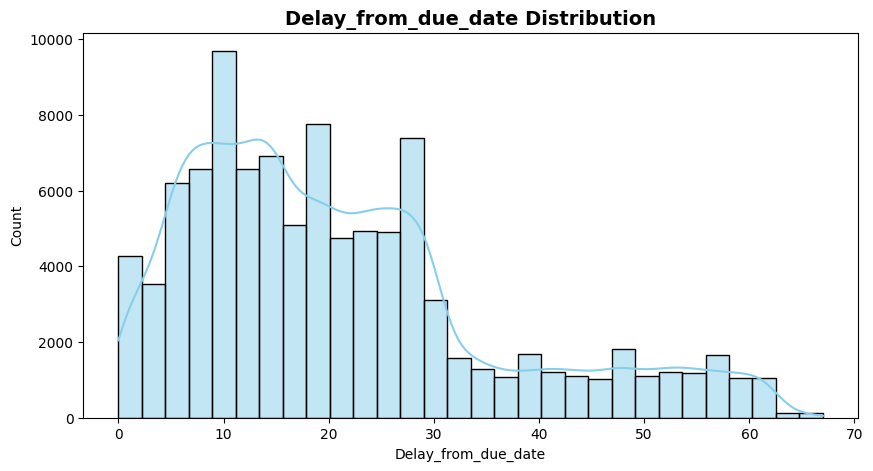

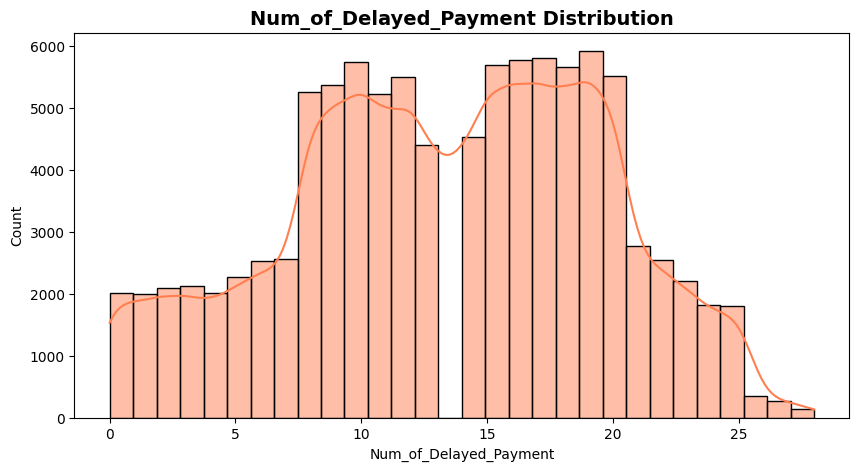

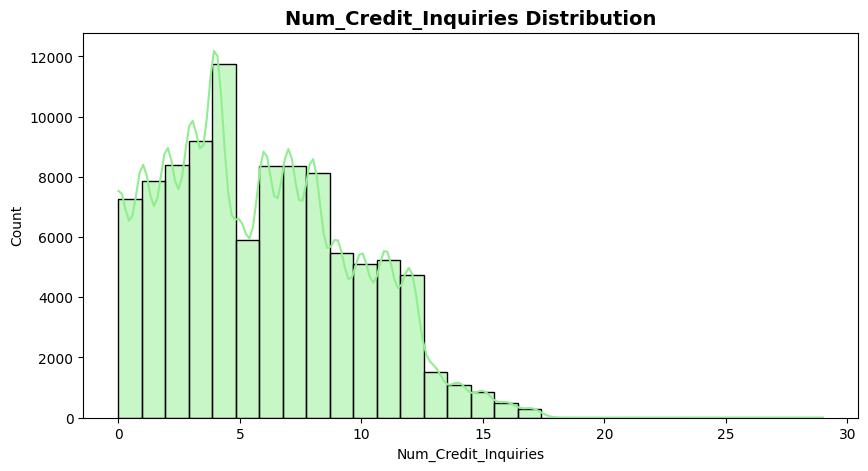

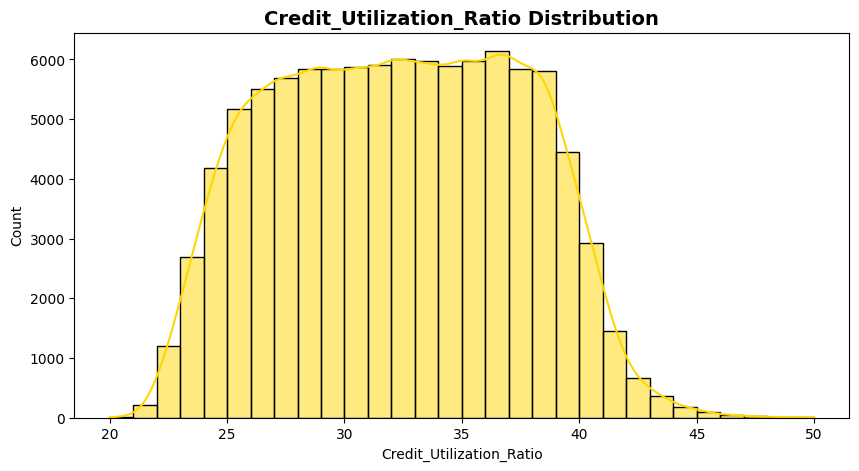

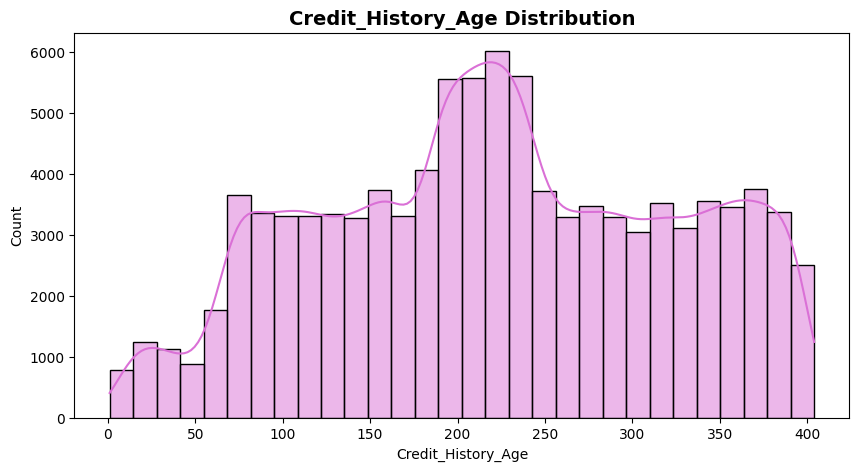

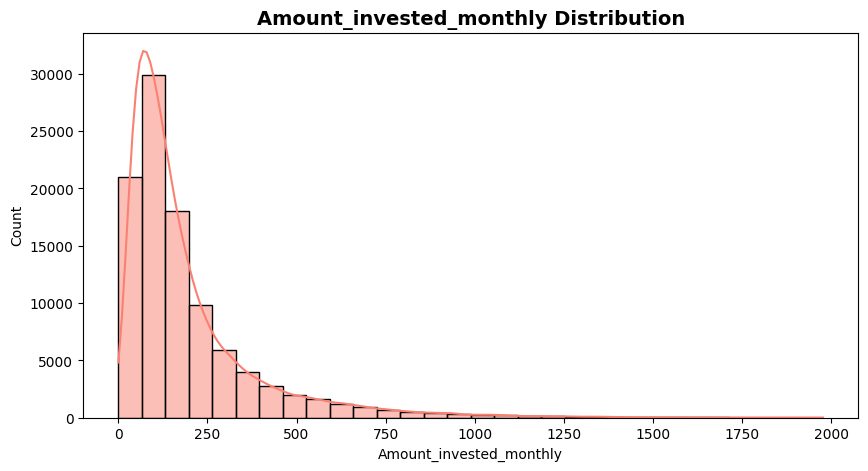

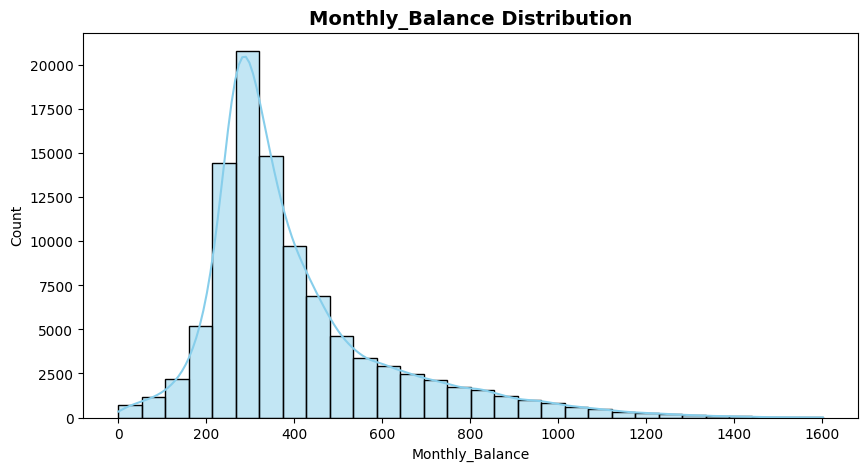

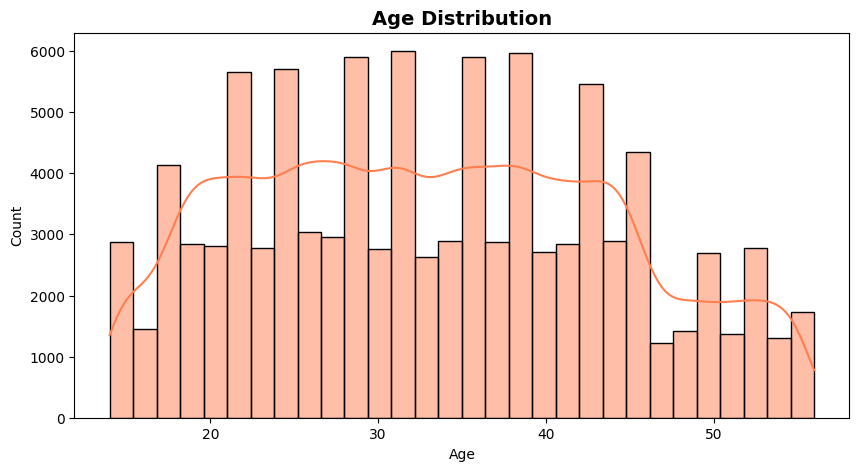

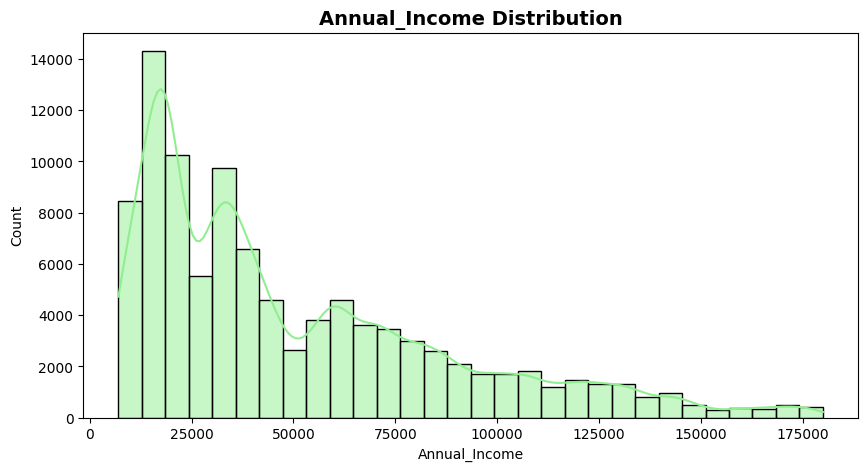

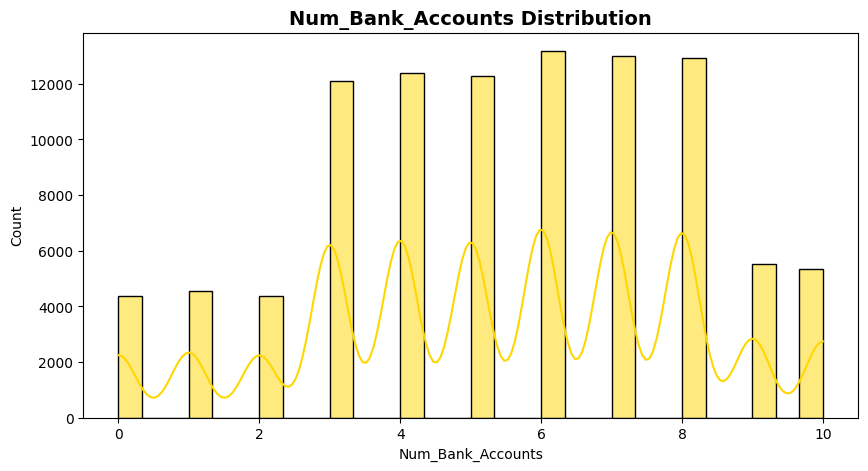

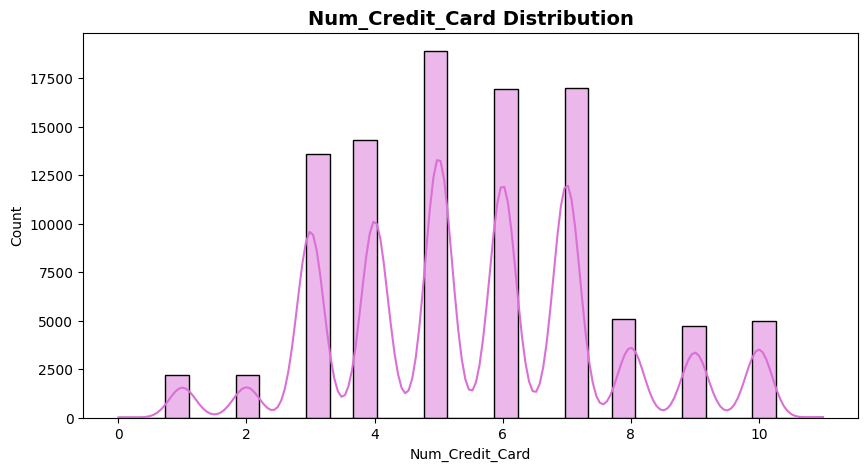

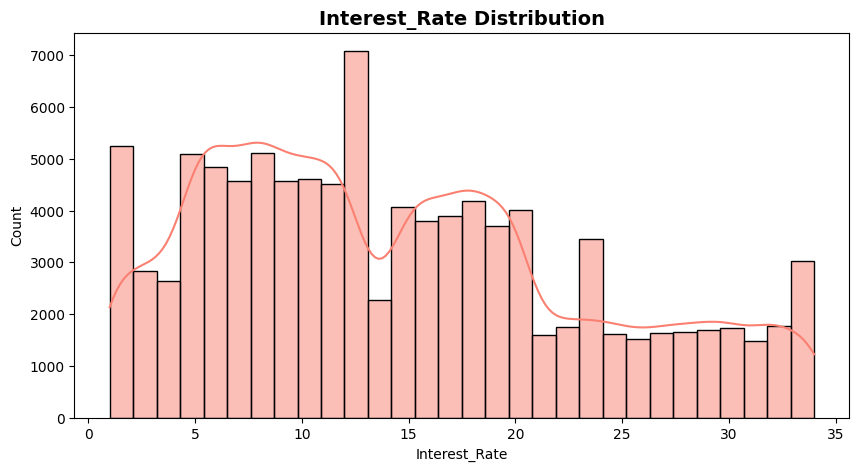

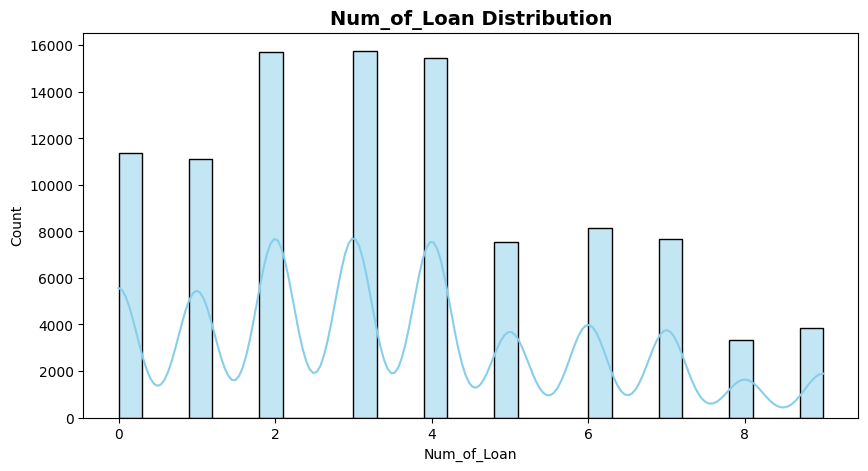

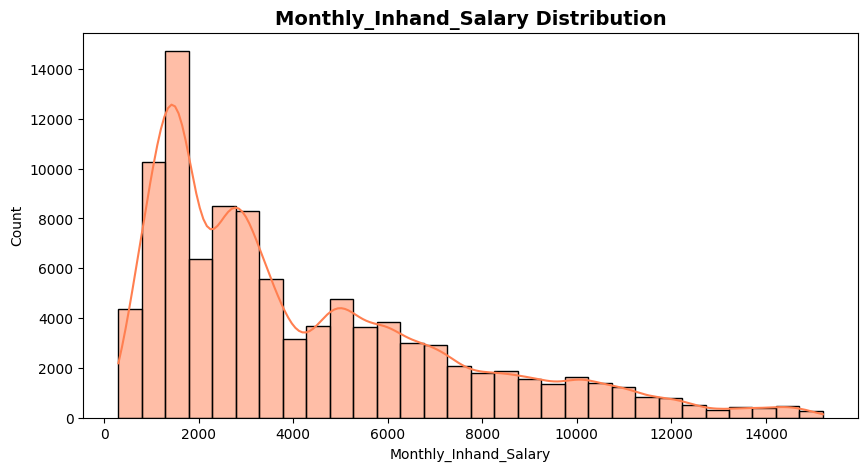

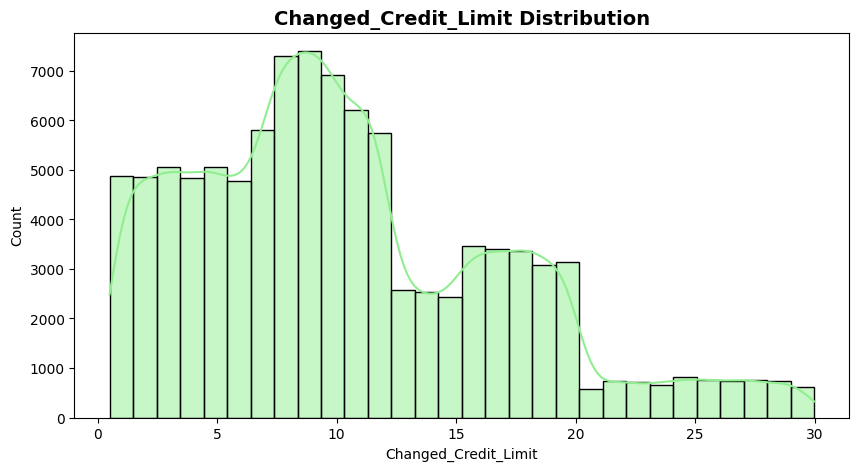

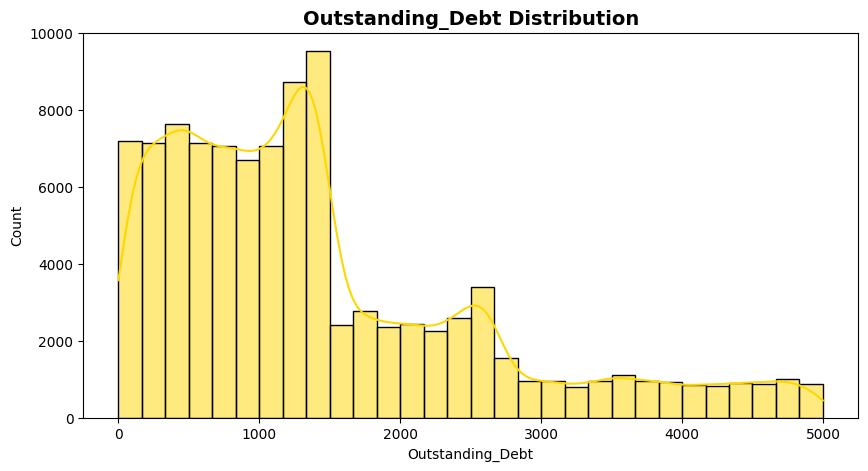

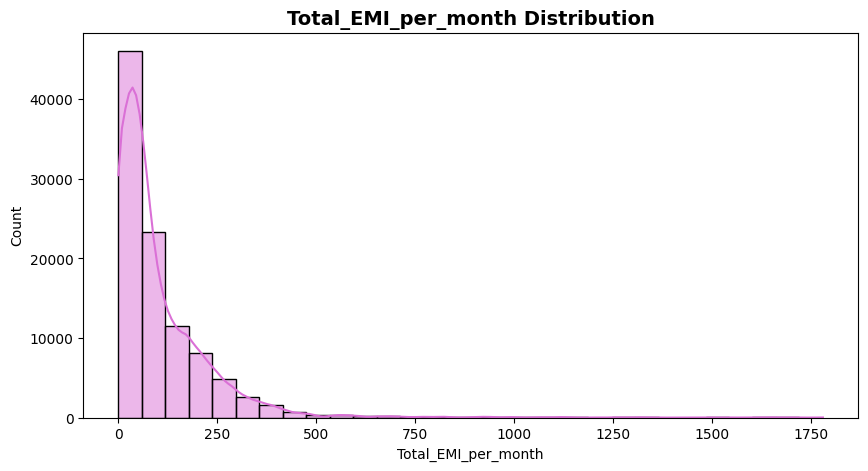

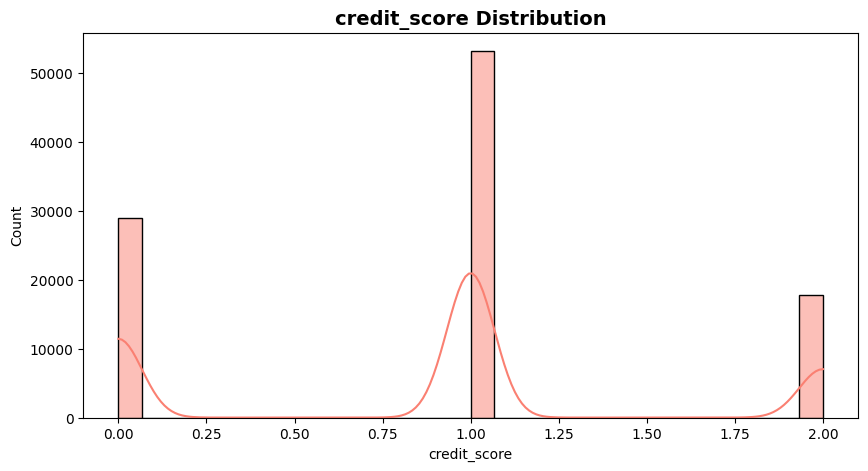

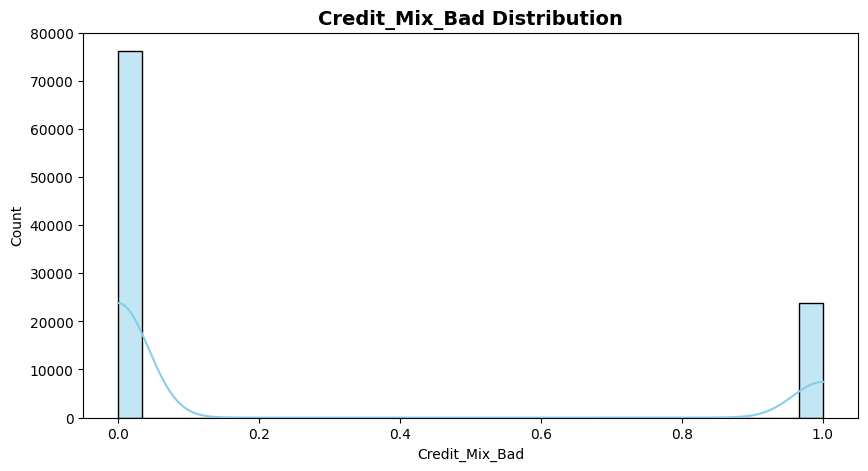

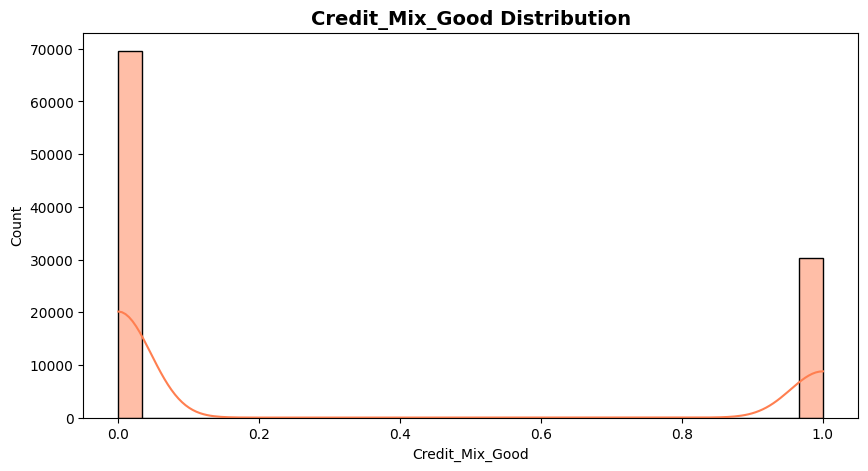

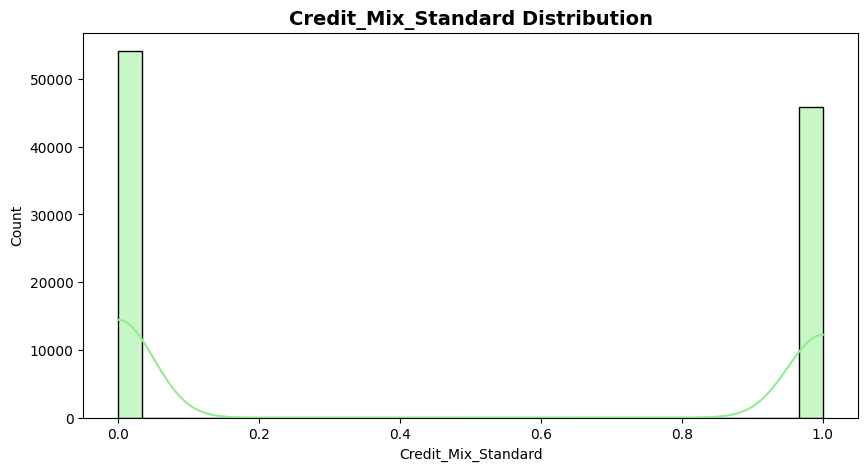

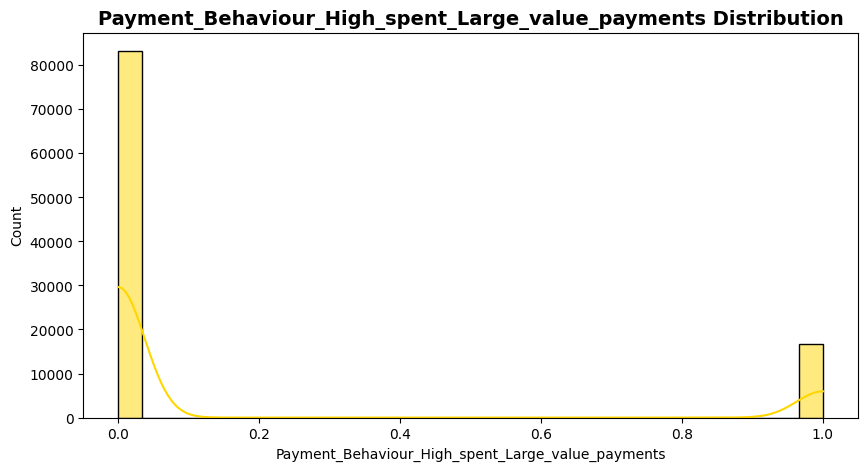

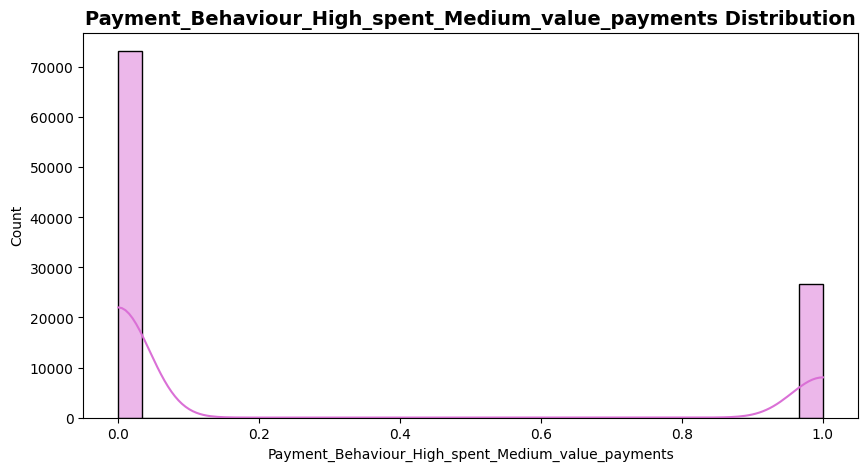

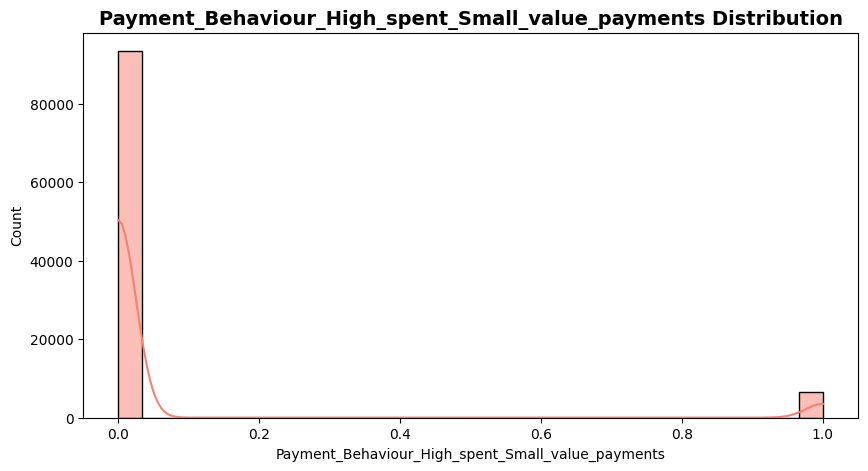

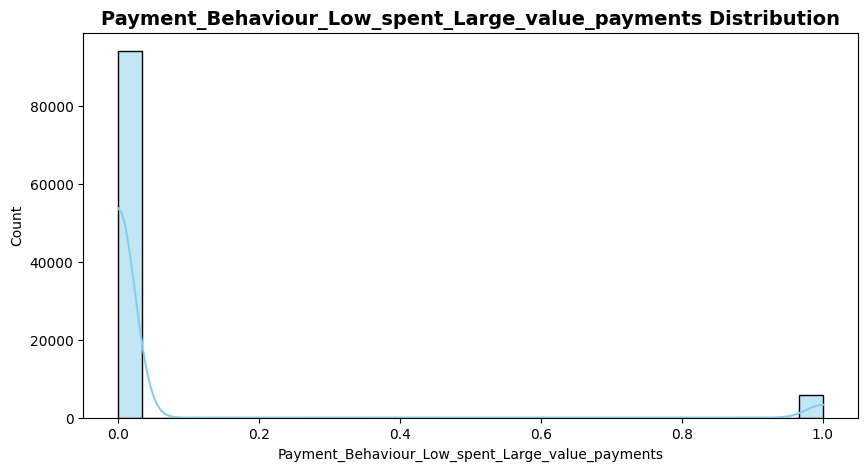

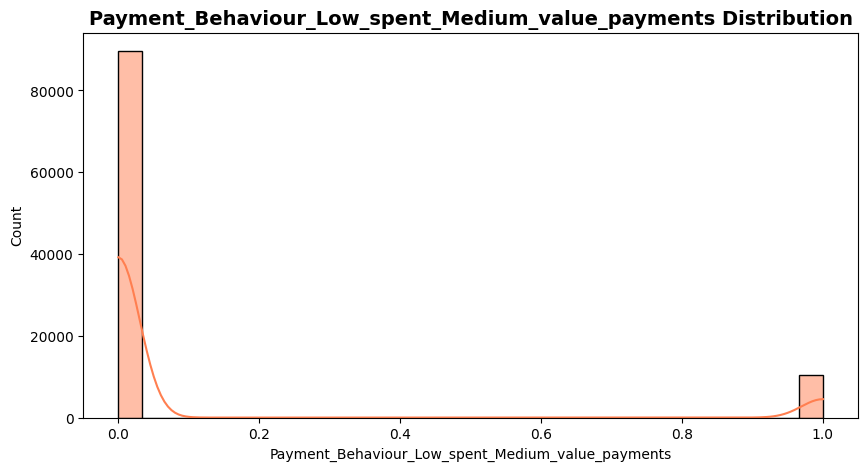

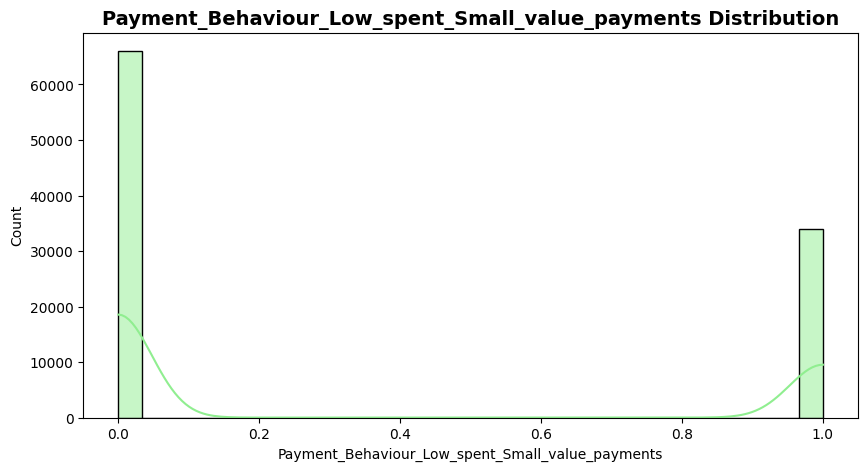

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Different color palettes
colors = ['skyblue', 'coral', 'lightgreen', 'gold', 'orchid', 'salmon']

num_cols = df.select_dtypes(include=['number']).columns

for idx, col in enumerate(num_cols):
    plt.figure(figsize=(10, 5))
    color = colors[idx % len(colors)]  # Cycle through colors
    sns.histplot(df[col], kde=True, color=color, bins=30)
    plt.title(f'{col} Distribution', fontsize=14, fontweight='bold')
    plt.show()

## we analyze the data and we can say that in this data credit card max use in betweeen 30 to 40 years
## before 20 and after 50 credit card use is very low

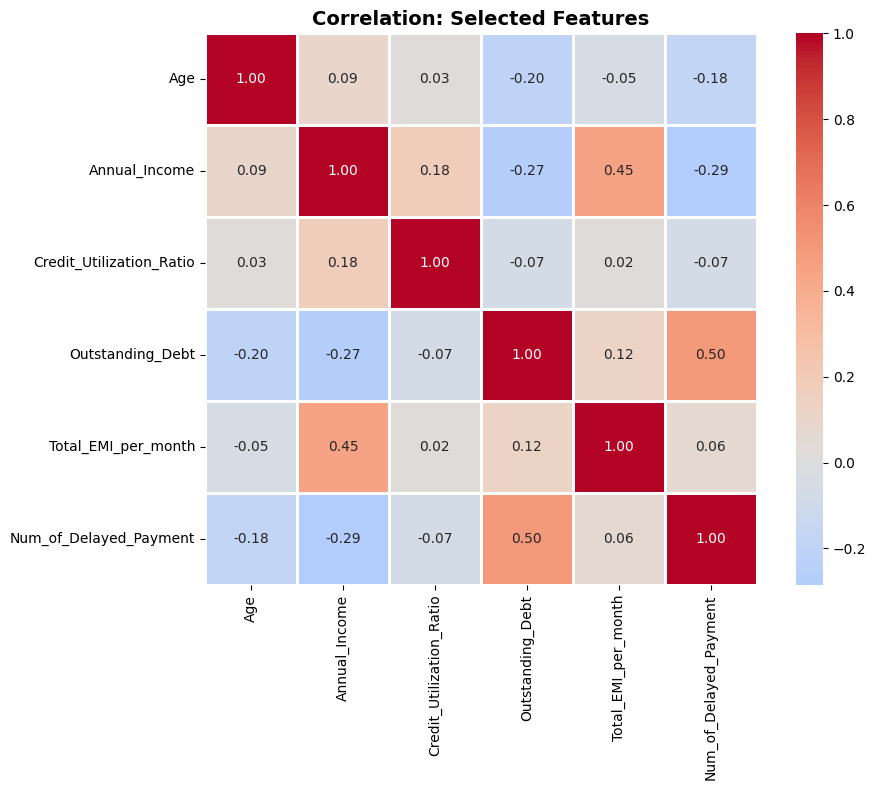

In [31]:
selected_cols = ['Age', 'Annual_Income', 'Credit_Utilization_Ratio', 
                'Outstanding_Debt', 'Total_EMI_per_month', 
                'Num_of_Delayed_Payment']
# Calculate correlation for selected columns only
corr = df[selected_cols].corr()
# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=2)
plt.title('Correlation: Selected Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## in this data age and anual income more  correlated  with each other 

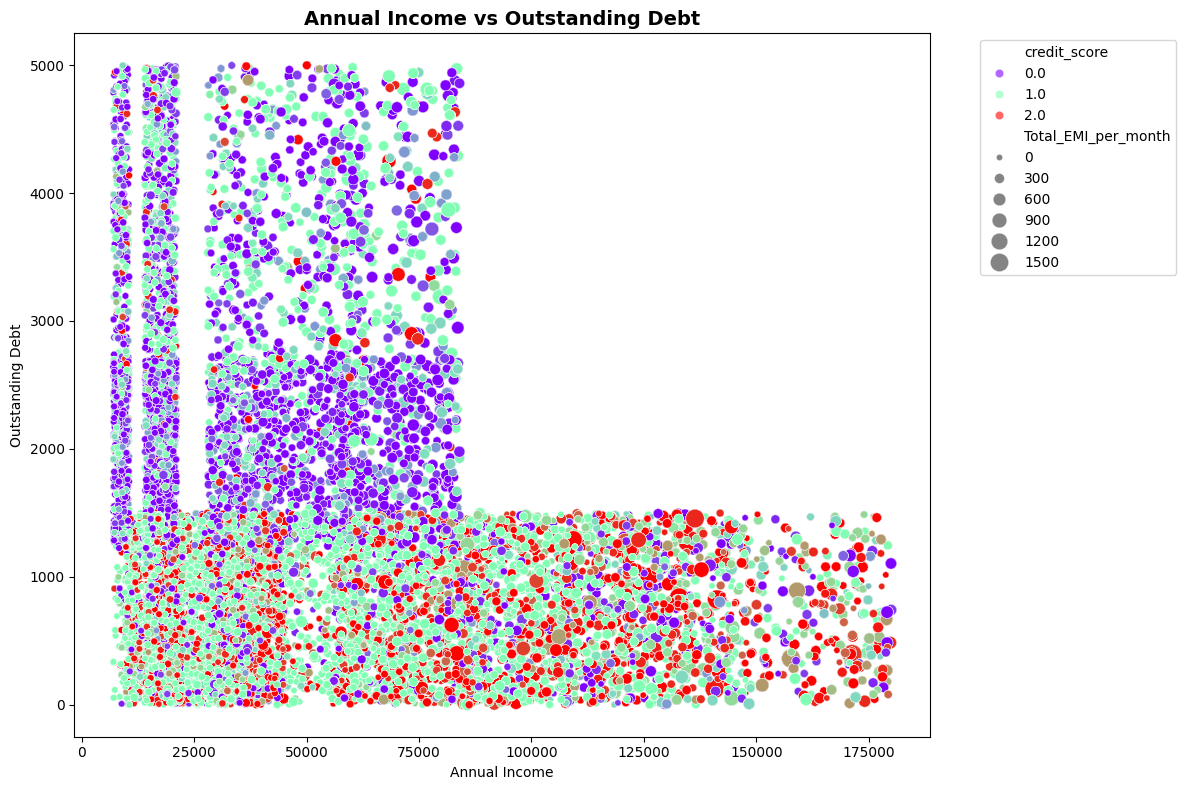

In [33]:

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, 
                x='Annual_Income', 
                y='Outstanding_Debt',
                hue='credit_score',           # Color by Credit Score
                size='Total_EMI_per_month',   # Size by EMI
                sizes=(20, 200),              # Min and max size
                palette='rainbow',
                alpha=0.6)
plt.title('Annual Income vs Outstanding Debt', fontsize=14, fontweight='bold')
plt.xlabel('Annual Income')
plt.ylabel('Outstanding Debt')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [43]:
# 1. Annual Income vs Monthly Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual_Income', y='Monthly_Inhand_Salary', 
                hue='credit_score', palette='Set1', alpha=0.6)
plt.title('Annual Income vs Monthly Salary', fontsize=14, fontweight='bold')
plt.xlabel('Annual Income')
plt.ylabel('Monthly Salary')
plt.legend(title='credit_score')
plt.show()

ValueError: Could not interpret value `credit_score` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [35]:
# 2. Outstanding Debt vs Total EMI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Outstanding_Debt', y='Total_EMI_per_month', 
                hue='Credit_Score', palette='Set2', alpha=0.6)
plt.title('Outstanding Debt vs Total EMI per Month', fontsize=14, fontweight='bold')
plt.xlabel('Outstanding Debt')
plt.ylabel('Total EMI per Month')
plt.legend(title='Credit Score')
plt.show()



ValueError: Could not interpret value `Credit_Score` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [ ]:
# 3. Credit Utilization Ratio vs Outstanding Debt
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Credit_Utilization_Ratio', y='Outstanding_Debt', 
                hue='Credit_Score', palette='coolwarm', alpha=0.6)
plt.title('Credit Utilization vs Outstanding Debt', fontsize=14, fontweight='bold')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Outstanding Debt')
plt.legend(title='Credit Score')
plt.show()


In [36]:
# 4. Age vs Credit History Age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Credit_History_Age', 
                hue='credit_score', palette='viridis', alpha=0.6)
plt.title('Age vs Credit History Age', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Credit History Age')
plt.legend(title='Credit Score')
plt.show()

ValueError: Could not interpret value `Credit_Score` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Annual_Income', 
                hue='Credit_Score', palette='viridis', alpha=0.6)
plt.title('Age vs annual income', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('annual income')
plt.legend(title='Credit Score')
plt.show()

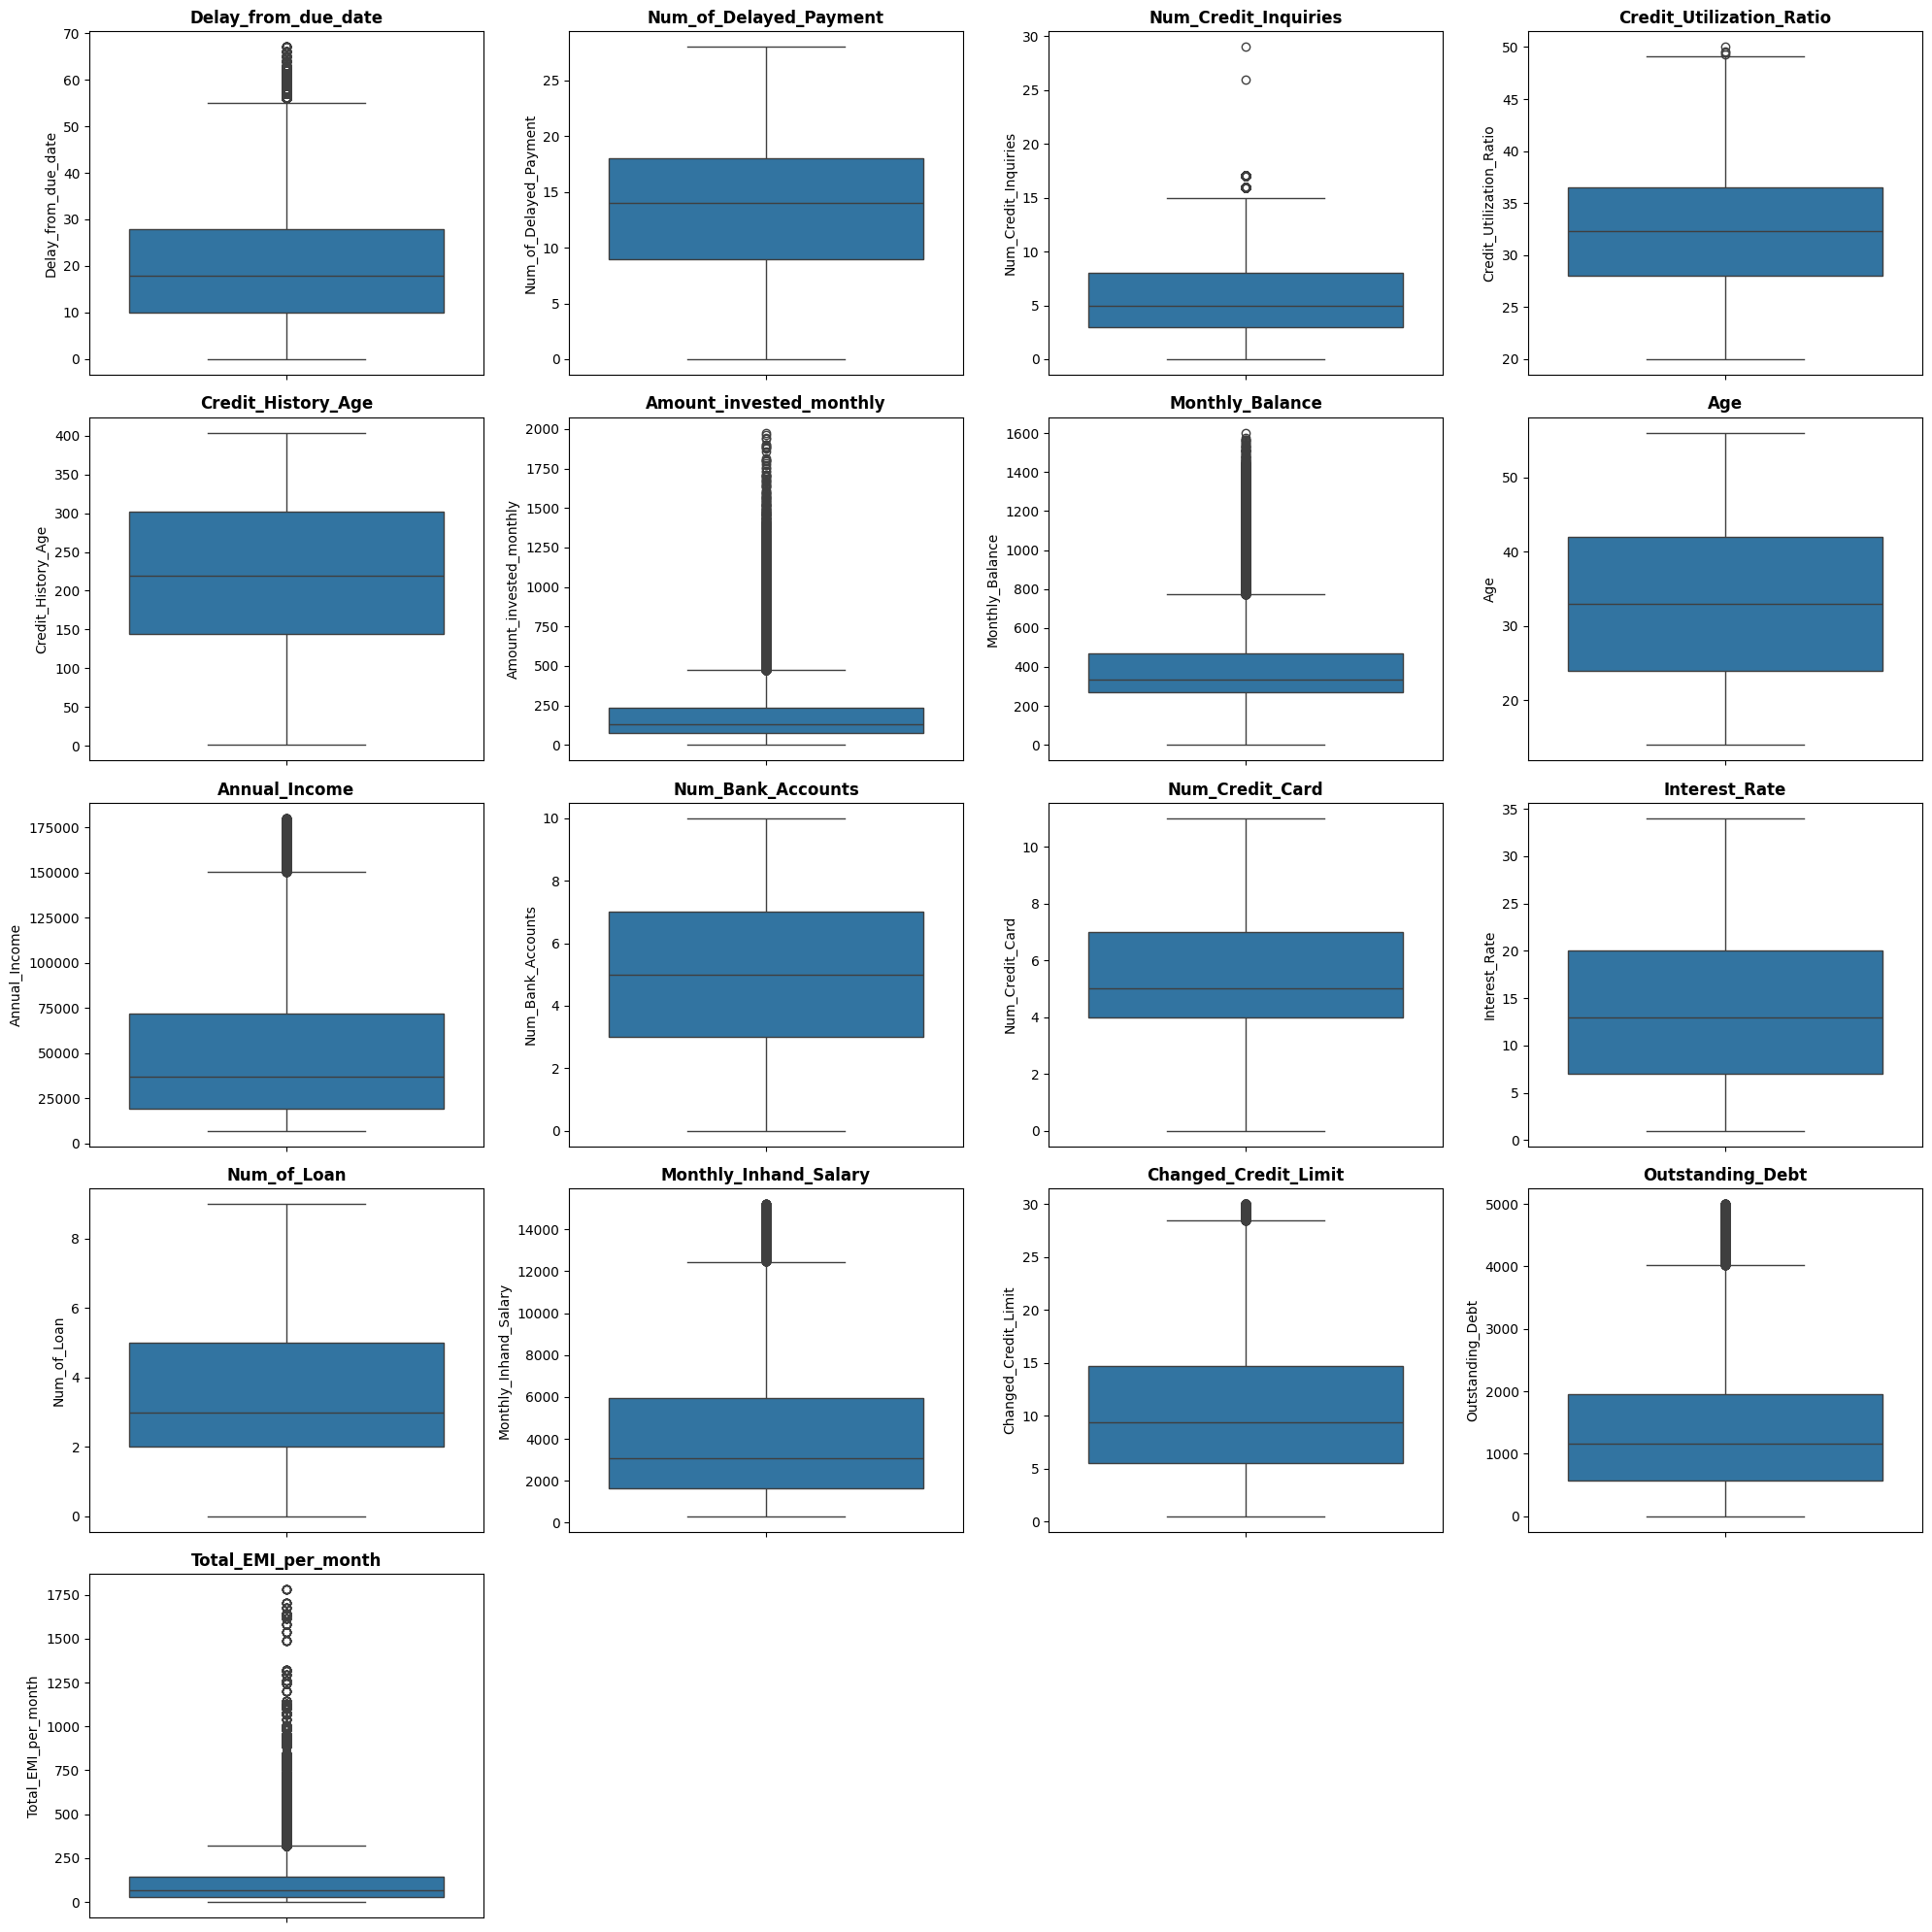

In [37]:


df = pd.read_csv('data/data.csv')

# Get numerical columns
cols = df.select_dtypes(include=['number']).columns.tolist()

# Setup grid
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
axes = axes.ravel()

# Loop and plot
for i, col in enumerate(cols):
    if i < len(axes):
        sns.boxplot(y=df[col], ax=axes[i])
        axes[i].set_title(col, fontweight='bold')

# Hide unused
for i in range(len(cols), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [38]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('data/data.csv')

print("="*80)
print("OUTLIER REMOVAL USING IQR METHOD")
print("="*80)
print(f"\nOriginal Dataset: {df.shape[0]} rows, {df.shape[1]} columns")

# Get numerical columns
num_cols = df.select_dtypes(include=['number']).columns.tolist()

# Create report
outlier_report = []

# Remove outliers
df_clean = df.copy()

for col in num_cols:
    # Calculate IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers_before = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    
    # Remove outliers
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    # Add to report
    outlier_report.append({
        'Column': col,
        'Outliers_Found': outliers_before,
        'Percentage': f"{outliers_before/len(df)*100:.2f}%",
        'Lower_Bound': round(lower_bound, 2),
        'Upper_Bound': round(upper_bound, 2)
    })

# Print report
report_df = pd.DataFrame(outlier_report)
print("\n" + "="*80)
print("OUTLIER DETECTION REPORT")
print("="*80)
print(report_df.to_string(index=False))

print("\n" + "="*80)
print("FINAL RESULTS")
print("="*80)
print(f"Cleaned Dataset: {df_clean.shape[0]} rows, {df_clean.shape[1]} columns")
print(f"Rows Removed: {df.shape[0] - df_clean.shape[0]}")
print(f"Percentage Removed: {(df.shape[0] - df_clean.shape[0])/df.shape[0]*100:.2f}%")

# Save cleaned data
df_clean.to_csv('data/data_no_outliers.csv', index=False)
print("\n Cleaned data saved to 'data/data_no_outliers.csv'")

OUTLIER REMOVAL USING IQR METHOD

Original Dataset: 99960 rows, 21 columns

OUTLIER DETECTION REPORT
                  Column  Outliers_Found Percentage  Lower_Bound  Upper_Bound
     Delay_from_due_date            4002      4.00%       -17.00        55.00
  Num_of_Delayed_Payment               0      0.00%        -4.50        31.50
    Num_Credit_Inquiries             767      0.77%        -4.50        15.50
Credit_Utilization_Ratio               4      0.00%        15.39        49.16
      Credit_History_Age               0      0.00%       -93.00       539.00
 Amount_invested_monthly            8199      8.20%      -167.21       475.25
         Monthly_Balance            7646      7.65%       -32.06       774.29
                     Age               0      0.00%        -3.00        69.00
           Annual_Income            2000      2.00%    -59175.90    150195.78
       Num_Bank_Accounts               0      0.00%        -3.00        13.00
         Num_Credit_Card               0 

In [39]:
df['Payment_Behaviour'].value_counts()
ohe = OneHotEncoder()
oh_encoded_data = ohe.fit_transform(df[['Payment_Behaviour']])
dataframe=  pd.DataFrame(oh_encoded_data.toarray(), columns = ohe.get_feature_names_out())
df= pd.concat([df,dataframe],axis=1)
df.head()


,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,3,7,4,26.822620,265,No,80.415295,312.494089,Good,Good,...,1824.843333,11.27,809.98,49.574949,0.0,1.0,0.0,0.0,0.0,0.0
1,3,7,4,31.944960,265,No,118.280222,284.629163,Good,Good,...,1824.843333,11.27,809.98,49.574949,0.0,1.0,0.0,0.0,0.0,0.0
2,3,7,4,28.609352,267,No,81.699521,331.209863,Good,Good,...,1824.843333,11.27,809.98,49.574949,0.0,1.0,0.0,0.0,0.0,0.0
3,5,4,4,31.377862,268,No,199.458074,223.451310,Good,Good,...,1824.843333,11.27,809.98,49.574949,0.0,1.0,0.0,0.0,0.0,0.0
4,6,4,4,24.797347,269,No,41.420153,341.489231,Good,Good,...,1824.843333,11.27,809.98,49.574949,0.0,1.0,0.0,0.0,0.0,0.0


In [40]:
df.drop('Payment_Behaviour',axis=1, inplace = True)

C:\Users\victus\AppData\Local\Temp\ipykernel_28352\2234959000.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Credit_Score', order=['Poor', 'Standard', 'Good'],


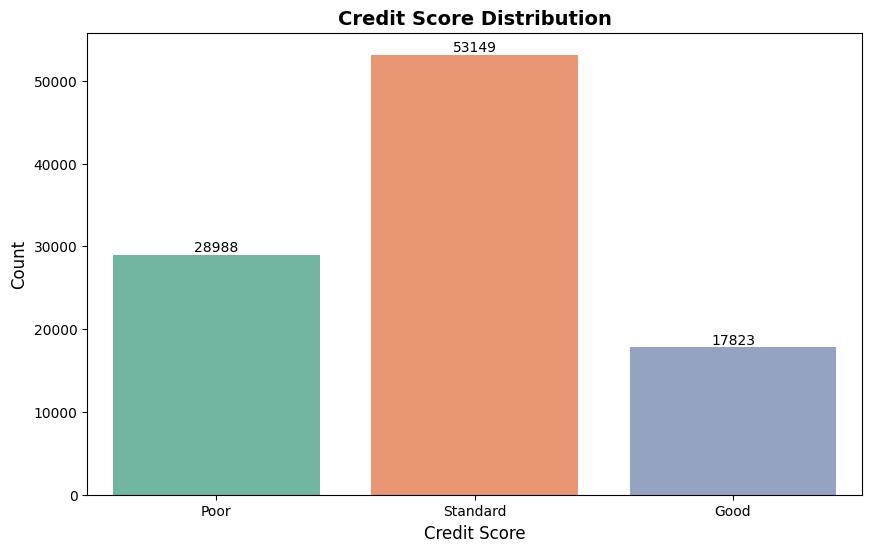

C:\Users\victus\AppData\Local\Temp\ipykernel_28352\2234959000.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Credit_Mix', palette='viridis')


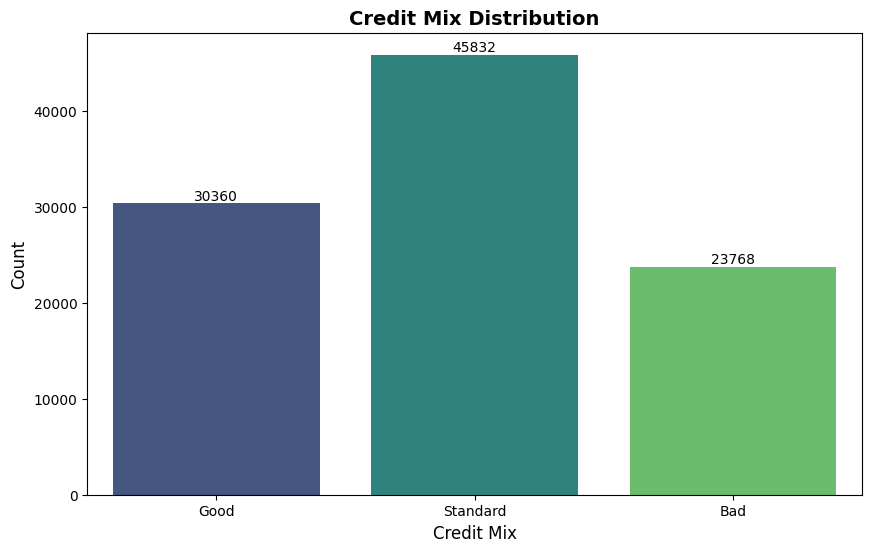

C:\Users\victus\AppData\Local\Temp\ipykernel_28352\2234959000.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_behaviours.index, y=top_behaviours.values, palette='rocket')


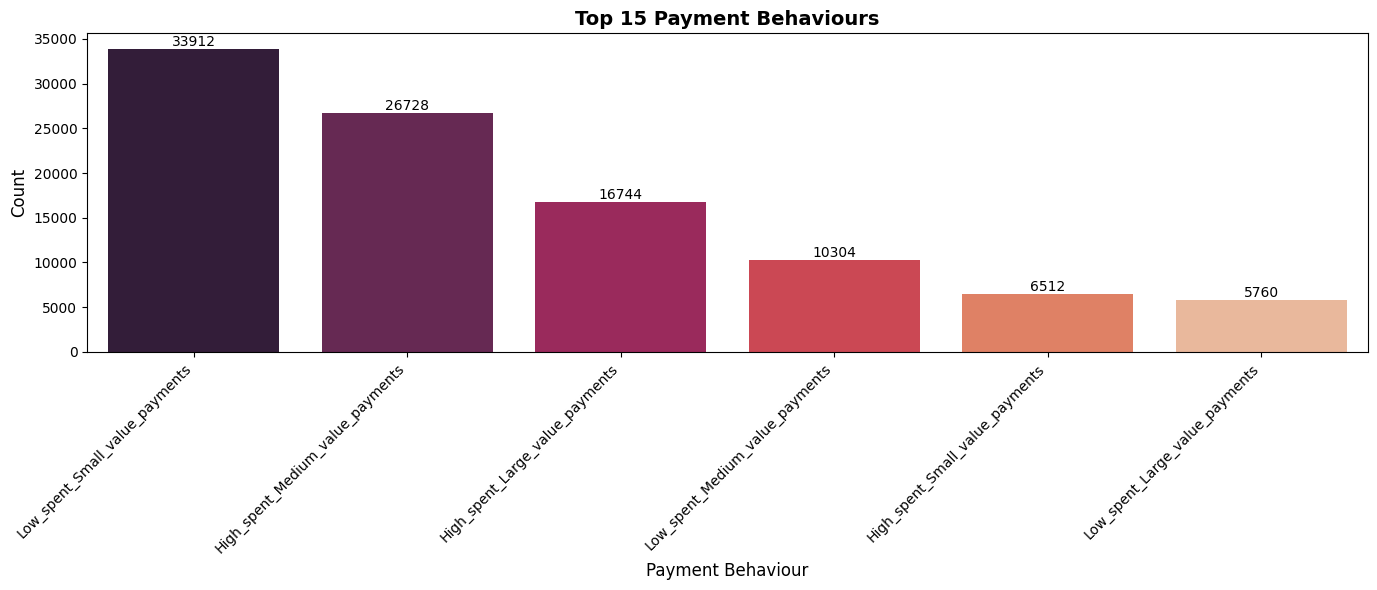

C:\Users\victus\AppData\Local\Temp\ipykernel_28352\2234959000.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Payment_of_Min_Amount', palette='coolwarm')


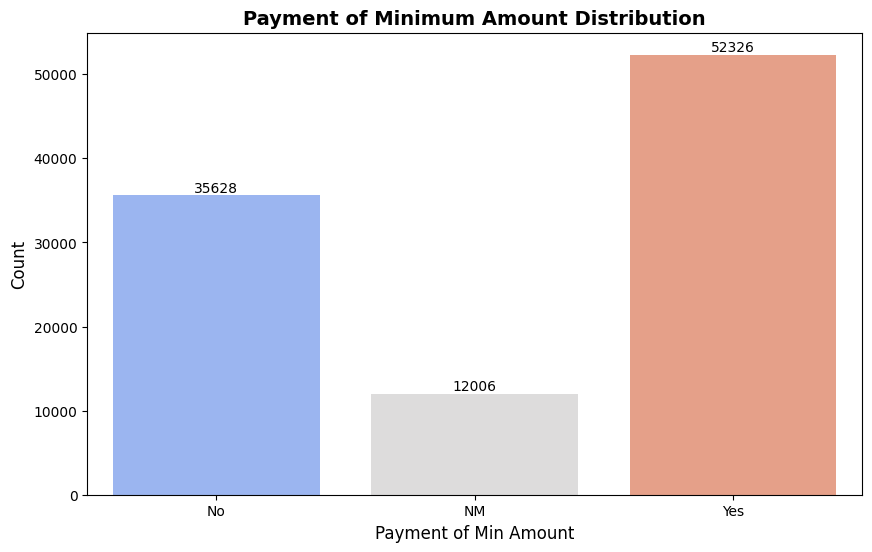

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('data/data.csv')

# ========== BARPLOTS FOR CATEGORICAL FEATURES ==========

# 1. Credit Score
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Credit_Score', order=['Poor', 'Standard', 'Good'], 
              palette='Set2')
plt.title('Credit Score Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Credit Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
for container in plt.gca().containers:
    plt.gca().bar_label(container)
plt.show()

# 2. Credit Mix
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Credit_Mix', palette='viridis')
plt.title('Credit Mix Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Credit Mix', fontsize=12)
plt.ylabel('Count', fontsize=12)
for container in plt.gca().containers:
    plt.gca().bar_label(container)
plt.show()

# 3. Payment Behaviour (Top 15)
plt.figure(figsize=(14, 6))
top_behaviours = df['Payment_Behaviour'].value_counts().head(15)
sns.barplot(x=top_behaviours.index, y=top_behaviours.values, palette='rocket')
plt.title('Top 15 Payment Behaviours', fontsize=14, fontweight='bold')
plt.xlabel('Payment Behaviour', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(top_behaviours.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# 4. Payment of Min Amount
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Payment_of_Min_Amount', palette='coolwarm')
plt.title('Payment of Minimum Amount Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Payment of Min Amount', fontsize=12)
plt.ylabel('Count', fontsize=12)
for container in plt.gca().containers:
    plt.gca().bar_label(container)
plt.show()